## Label image refinement
Similar to [refining binary images](image_segmentation.binary_mask_refinement) it is also possible to refine label images. This notebook shows how to do this.

See also
* [scikit-image's Expand segmentation labels without overlap tutorial](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_expand_labels.html)

In [8]:
import napari
import pyclesperanto_prototype as cle
from skimage.data import cells3d
import matplotlib.pyplot as plt
from skimage.morphology import closing, disk
from skimage.io import imsave
from skimage.filters.rank import maximum
from skimage.segmentation import expand_labels
from skimage.measure import label

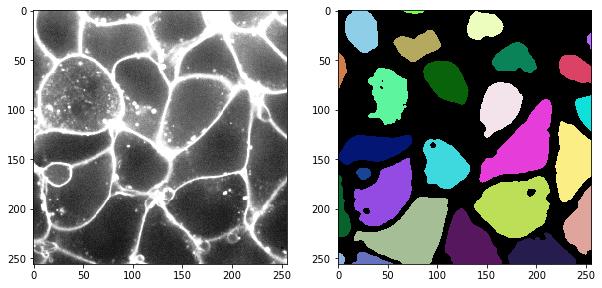

In [2]:
# load image
image = cells3d()
membrane2d = cle.push(image[30,0])

# segment and label the image
labels = label(cle.gaussian_blur(membrane2d, sigma_x=2, sigma_y=2) < 2000)

# visualization
fig, axs = plt.subplots(1,2, figsize=(10,10))
cle.imshow(membrane2d, plot=axs[0], max_display_intensity=5000)
cle.imshow(labels, labels=True, plot=axs[1])

## Dilating / expanding labels
When dilating labels in a label image, we cannot apply a maximum filter, because the maximum filter lead to labels swapping into each other. The label with the larger value would increas while labels with lower values would decrease. We can demonstrate that using [maximum](https://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.maximum) filters and the [expand_labels function](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.expand_labels) in scikit-image. 

C:\Users\rober\AppData\Local\Temp\ipykernel_19052\668206942.py:3: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  maximum_label_image = maximum(labels, footprint=disk(r))
C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 26 fits in uint8
  return _convert(image, np.uint8, force_copy)


Text(0.5, 1.0, 'Expanded labels')

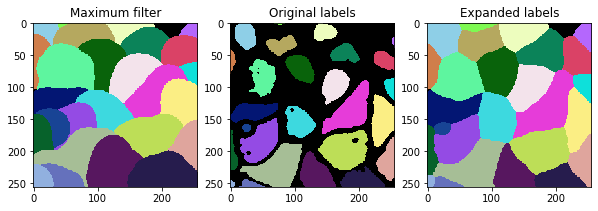

In [3]:
r = 25

maximum_label_image = maximum(labels, footprint=disk(r))
expaned_label_image = expand_labels(labels, distance=r)

fig, axs = plt.subplots(1,3, figsize=(10,10))
cle.imshow(maximum_label_image, labels=True, plot=axs[0])
cle.imshow(labels, labels=True, plot=axs[1])
cle.imshow(expaned_label_image, labels=True, plot=axs[2])


axs[0].set_title("Maximum filter")
axs[1].set_title("Original labels")
axs[2].set_title("Expanded labels")

## Dilating and eroding labels
There is also the opposite of dilation: Erosion of labels. The latter function is available in clesperanto.

Text(0.5, 1.0, 'Eroded labels (r=5)')

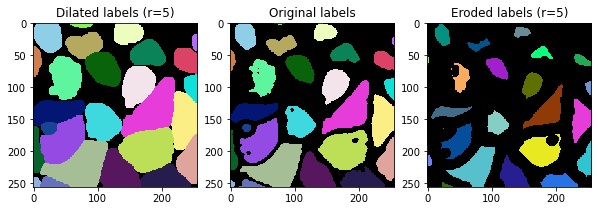

In [4]:
r = 5

fix, axs = plt.subplots(1,3, figsize=(10,10))

cle.imshow(cle.dilate_labels(labels, radius=r), plot=axs[0], labels=True)
cle.imshow(labels, plot=axs[1], labels=True)
cle.imshow(cle.erode_labels(labels, radius=r), plot=axs[2], labels=True)

axs[0].set_title("Dilated labels (r=" + str(r) + ")")
axs[1].set_title("Original labels")
axs[2].set_title("Eroded labels (r=" + str(r) + ")")

## Label opening and closing
Opening and closing are uncommon operations applied to label images as discussed [here](https://twitter.com/haesleinhuepf/status/1492215964305436673). They are also powerful options for post-processing label images. To show in more detail what these operations are doing, we look at the results in a for-loop using different radii.

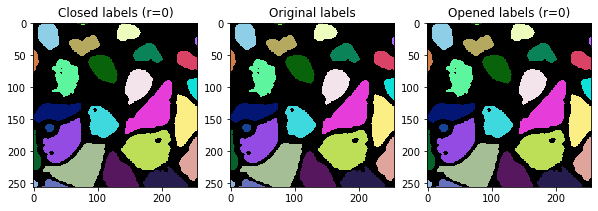

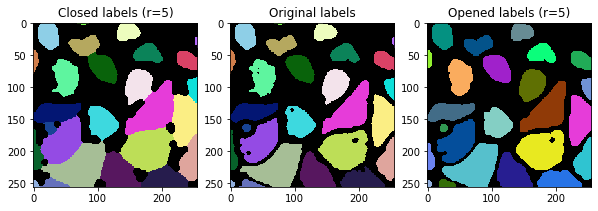

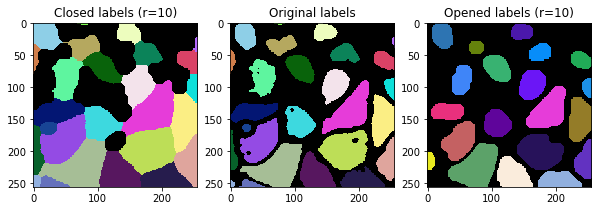

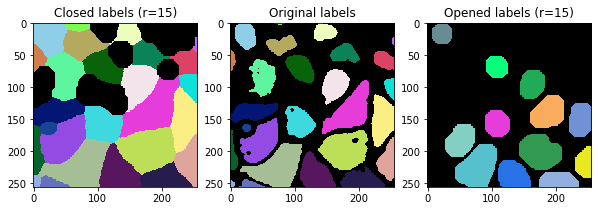

In [5]:
for i, r in enumerate(range(0, 20, 5)):
    
    fix, axs = plt.subplots(1,3, figsize=(10,10))
    
    cle.imshow(cle.closing_labels(labels, radius=r), plot=axs[0], labels=True)
    cle.imshow(labels, plot=axs[1], labels=True)
    cle.imshow(cle.opening_labels(labels, radius=r), plot=axs[2], labels=True)
    
    axs[0].set_title("Closed labels (r=" + str(r) + ")")
    axs[1].set_title("Original labels")
    axs[2].set_title("Opened labels (r=" + str(r) + ")")

## Comparison of label closing to binary closing
The closing operations applied to label images is very similar to a binary closing.

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:46: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


Text(0.5, 1.0, 'Binary closing (r=5)')

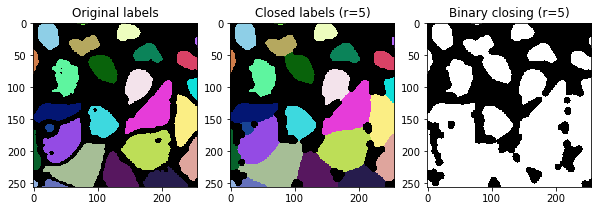

In [6]:
r = 5

fix, axs = plt.subplots(1,3, figsize=(10,10))

cle.imshow(labels, plot=axs[0], labels=True)
cle.imshow(cle.closing_labels(labels, radius=r), plot=axs[1], labels=True)
cle.imshow(cle.closing_sphere(labels != 0, radius_x=r, radius_y=r), plot=axs[2], color_map="Greys_r")

axs[0].set_title("Original labels")
axs[1].set_title("Closed labels (r=" + str(r) + ")")
axs[2].set_title("Binary closing (r=" + str(r) + ")")


## Exercise
Open the image in napari and use the menu `Tools > Segmentation post-processing > Explan labels (scikit-image, nsbatwm)`. Change the radius and apply the algorithm again.

What operation does it apply under the hood?

Can you call the same algorithm from python?

In [9]:
viewer = napari.Viewer()

viewer.add_image(membrane2d)
viewer.add_labels(labels)

<Labels layer 'labels' at 0x23c8d53cf10>

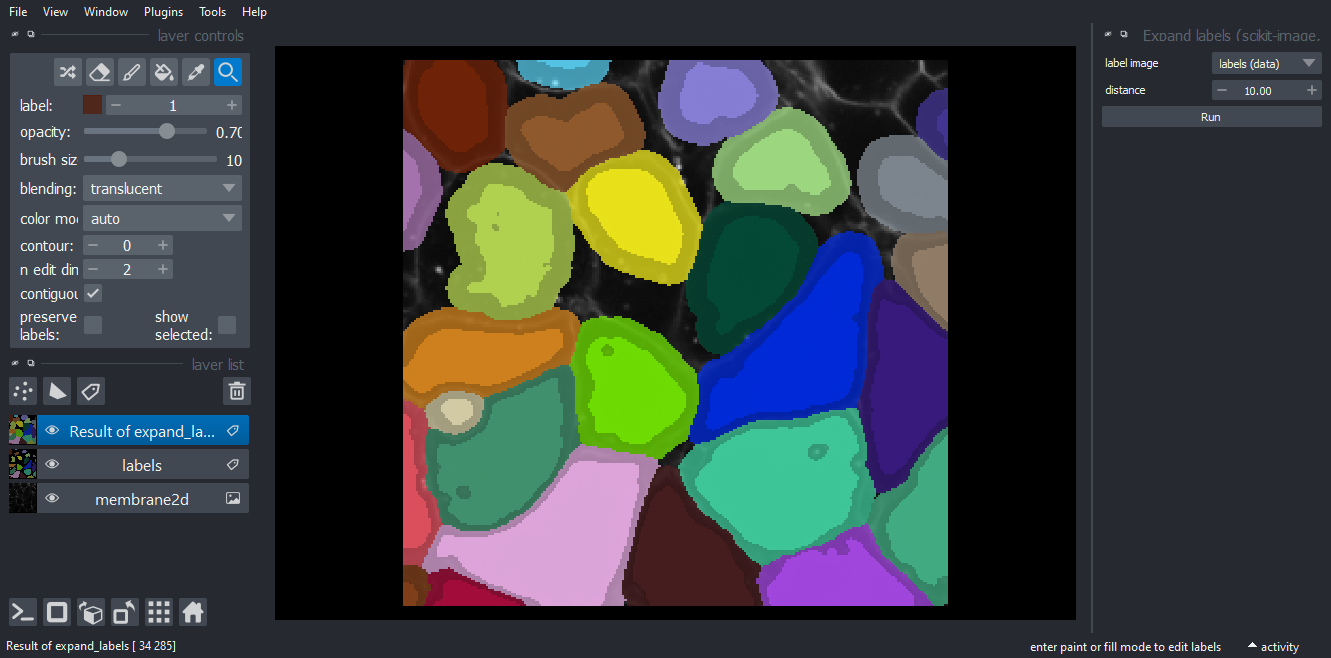

In [10]:
napari.utils.nbscreenshot(viewer)